<a href="https://colab.research.google.com/github/jeonjnh/python_colab_exercise/blob/main/population_data_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# 대한민국 통계청 출생자수 분석 (Pandas)

## Read CSV File

In [2]:
df_kosis = pd.read_csv("/content/population_kosis.csv",encoding="cp949")
# encoding="cp949" --> 한글인코딩
df_kosis.shape

(19, 79)

In [3]:
df_kosis.head()

,시군구별,2019.11,2019.11.1,2019.11.2,2019.12,2019.12.1,2019.12.2,2020.01,2020.01.1,2020.01.2,...,2021.09.2,2021.10,2021.10.1,2021.10.2,2021.11,2021.11.1,2021.11.2,2021.12,2021.12.1,2021.12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,23727,12097,11630,21228,11023,10205,26646,13622,13024,...,10743,20749,10598,10151,19829,10201,9628,17179,8725,8454
2,서울특별시,4170,2128,2042,3670,1953,1717,4701,2394,2307,...,1814,3533,1839,1694,3513,1818,1695,3034,1557,1477
3,부산광역시,1321,683,638,1240,671,569,1567,799,768,...,627,1183,603,580,1043,549,494,888,458,430
4,대구광역시,1100,585,515,942,488,454,1098,569,529,...,452,890,470,420,792,411,381,685,363,322


## Tidy Data


### 1.1 Data Reshape
https://pandas.pydata.org/docs/user_guide/reshaping.html
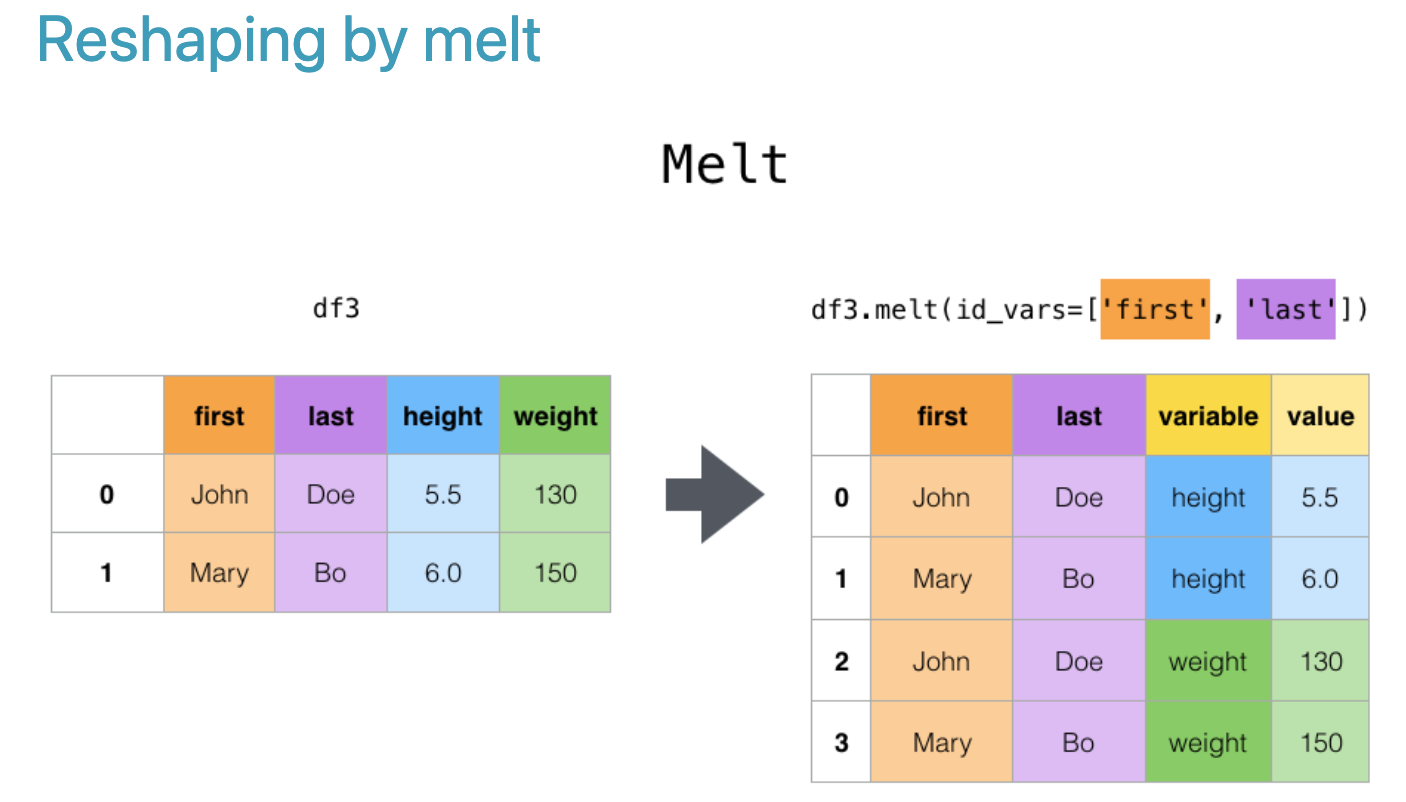

In [4]:
df_kosis.head(2)

,시군구별,2019.11,2019.11.1,2019.11.2,2019.12,2019.12.1,2019.12.2,2020.01,2020.01.1,2020.01.2,...,2021.09.2,2021.10,2021.10.1,2021.10.2,2021.11,2021.11.1,2021.11.2,2021.12,2021.12.1,2021.12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,23727,12097,11630,21228,11023,10205,26646,13622,13024,...,10743,20749,10598,10151,19829,10201,9628,17179,8725,8454


In [5]:
df = df_kosis.melt(id_vars="시군구별")
df.head()

,시군구별,variable,value
0,시군구별,2019.11,계 (명)
1,전국,2019.11,23727
2,서울특별시,2019.11,4170
3,부산광역시,2019.11,1321
4,대구광역시,2019.11,1100


In [6]:
df["시군구별"].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [7]:
print(df.shape)

# 불필요한 헤더 데이터 삭제
df = df[df["시군구별"] != "시군구별"].copy()
df.shape

(1482, 3)


(1404, 3)

In [8]:
df

,시군구별,variable,value
1,전국,2019.11,23727
2,서울특별시,2019.11,4170
3,부산광역시,2019.11,1321
4,대구광역시,2019.11,1100
5,인천광역시,2019.11,1417
...,...,...,...
1477,전라북도,2021.12.2,244
1478,전라남도,2021.12.2,261
1479,경상북도,2021.12.2,382
1480,경상남도,2021.12.2,478


In [9]:
df["시군구별"].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [10]:
df.head()

,시군구별,variable,value
1,전국,2019.11,23727
2,서울특별시,2019.11,4170
3,부산광역시,2019.11,1321
4,대구광역시,2019.11,1100
5,인천광역시,2019.11,1417


In [11]:
df["연도"] = df["variable"].str.split(".",expand=True)[0]
df["월"] = df["variable"].str.split(".",expand=True)[1]
df["성별"] = df["variable"].str.split(".",expand=True)[2]
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,2019.11,23727,2019,11,None
2,서울특별시,2019.11,4170,2019,11,None
3,부산광역시,2019.11,1321,2019,11,None
4,대구광역시,2019.11,1100,2019,11,None
5,인천광역시,2019.11,1417,2019,11,None


In [12]:
df.tail()

,시군구별,variable,value,연도,월,성별
1477,전라북도,2021.12.2,244,2021,12,2
1478,전라남도,2021.12.2,261,2021,12,2
1479,경상북도,2021.12.2,382,2021,12,2
1480,경상남도,2021.12.2,478,2021,12,2
1481,제주특별자치도,2021.12.2,109,2021,12,2


In [13]:
df["성별"].unique() 
# 성별 데이터 1,2의 데이터 타입은 object

array([None, '1', '2'], dtype=object)

In [14]:
df["성별"].nunique() 
# None 은 카운트되지 않음

2

In [15]:
df["성별"] = df["성별"].fillna("전체")
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,2019.11,23727,2019,11,전체
2,서울특별시,2019.11,4170,2019,11,전체
3,부산광역시,2019.11,1321,2019,11,전체
4,대구광역시,2019.11,1100,2019,11,전체
5,인천광역시,2019.11,1417,2019,11,전체


In [16]:
df["성별"].unique() 

array(['전체', '1', '2'], dtype=object)

In [17]:
df["성별"] = df["성별"].replace("1","남자").replace("2","여자")
df["성별"].unique() 

array(['전체', '남자', '여자'], dtype=object)

In [18]:
df["성별"].value_counts()

전체    468
남자    468
여자    468
Name: 성별, dtype: int64

In [19]:
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,2019.11,23727,2019,11,전체
2,서울특별시,2019.11,4170,2019,11,전체
3,부산광역시,2019.11,1321,2019,11,전체
4,대구광역시,2019.11,1100,2019,11,전체
5,인천광역시,2019.11,1417,2019,11,전체


In [20]:
df = df.rename(columns={"variable":"기간","value":"출생아수"})
df.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,2019.11,23727,2019,11,전체
2,서울특별시,2019.11,4170,2019,11,전체
3,부산광역시,2019.11,1321,2019,11,전체
4,대구광역시,2019.11,1100,2019,11,전체
5,인천광역시,2019.11,1417,2019,11,전체


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404 entries, 1 to 1481
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    1404 non-null   object
 1   기간      1404 non-null   object
 2   출생아수    1404 non-null   object
 3   연도      1404 non-null   object
 4   월       1404 non-null   object
 5   성별      1404 non-null   object
dtypes: object(6)
memory usage: 76.8+ KB


In [22]:
#출생아수의 데이터 타입이 object임, int로 변경
import numpy as np
#데이터가 없을시 0으로 전처리시 평균값 왜곡 발생 가능성 있음
df["출생아수"] = df["출생아수"].replace("-",np.nan)
df["출생아수"] = df["출생아수"].astype(float)
df["출생아수"].describe()

count     1404.000000
mean      1646.307692
std       3604.156747
min        106.000000
25%        330.750000
50%        561.000000
75%        959.500000
max      26646.000000
Name: 출생아수, dtype: float64

In [23]:
df.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,2019.11,23727.0,2019,11,전체
2,서울특별시,2019.11,4170.0,2019,11,전체
3,부산광역시,2019.11,1321.0,2019,11,전체
4,대구광역시,2019.11,1100.0,2019,11,전체
5,인천광역시,2019.11,1417.0,2019,11,전체


In [24]:
df_all = df[(df["시군구별"] == "전국") & (df["성별"] == "전체") ]
df_all.head(2)

,시군구별,기간,출생아수,연도,월,성별
1,전국,2019.11,23727.0,2019,11,전체
58,전국,2019.12,21228.0,2019,12,전체


In [25]:
df_all = df_all[["연도","월","출생아수"]].copy()
df_all.head()

,연도,월,출생아수
1,2019,11,23727.0
58,2019,12,21228.0
115,2020,01,26646.0
172,2020,02,22759.0
229,2020,03,24190.0


In [26]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [27]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

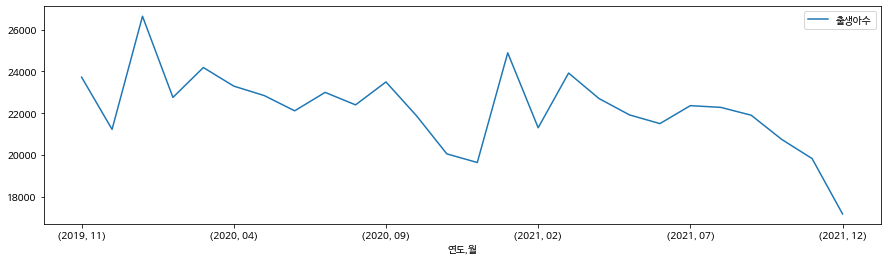

In [29]:
df_all.set_index(["연도","월"]).plot(figsize=(15,4))

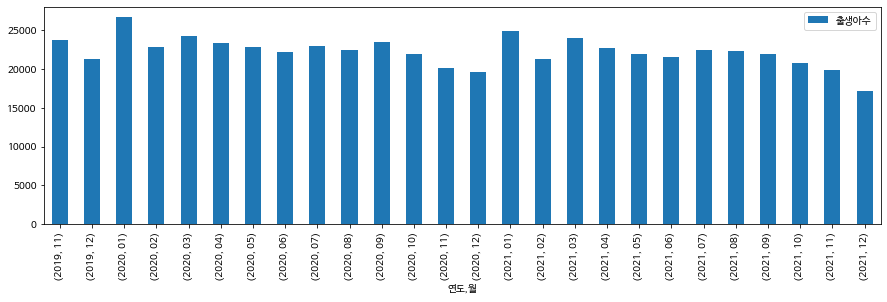

In [30]:
df_all.set_index(["연도","월"]).plot.bar(figsize=(15,4))

In [32]:
df_all.head()

,연도,월,출생아수
1,2019,11,23727.0
58,2019,12,21228.0
115,2020,01,26646.0
172,2020,02,22759.0
229,2020,03,24190.0


In [33]:
import seaborn as sns

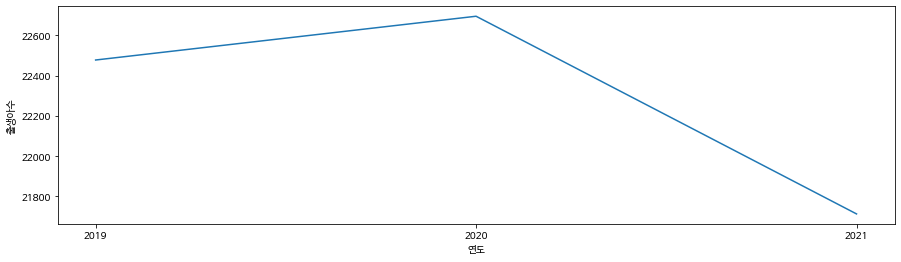

In [39]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_all,x="연도",y="출생아수", ci=None) 
#연평균 파란색선, 구간은 ci - confidence interval (95%신뢰구간)
#seborn은 평균값을 자동으로 계산 pandas는 추가 계산 필요

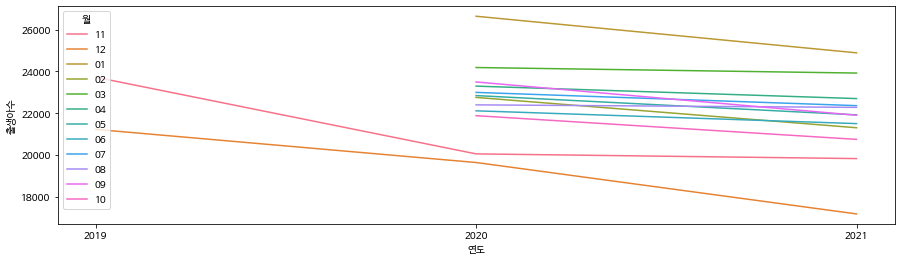

In [40]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_all,x="연도",y="출생아수", ci=None, hue="월")

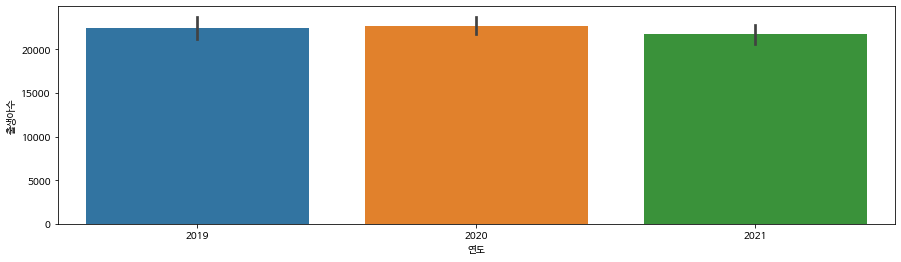

In [36]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_all,x="연도",y="출생아수")

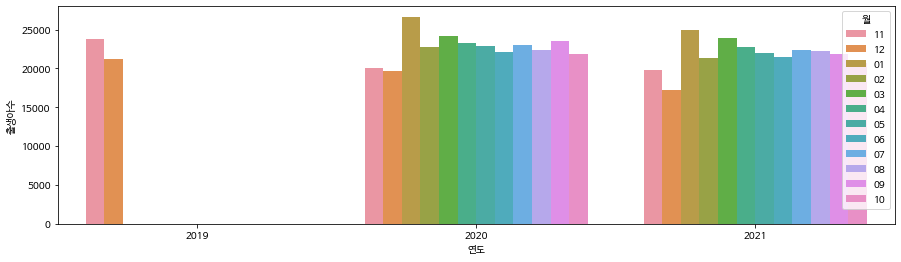

In [41]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_all,x="연도",y="출생아수",hue="월")

In [46]:
df_local = df[df["시군구별"] != "전국"].copy()
df_local.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,2019.11,4170.0,2019,11,전체
3,부산광역시,2019.11,1321.0,2019,11,전체
4,대구광역시,2019.11,1100.0,2019,11,전체
5,인천광역시,2019.11,1417.0,2019,11,전체
6,광주광역시,2019.11,668.0,2019,11,전체


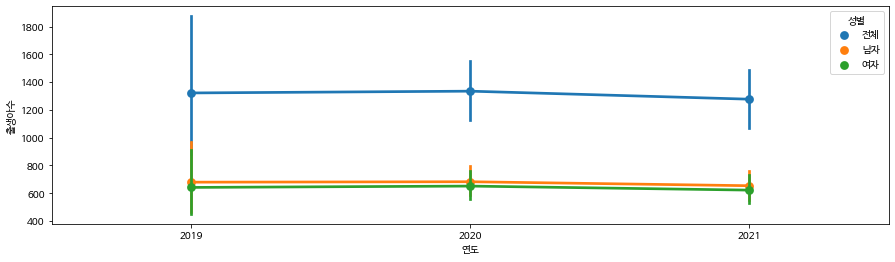

In [49]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local,x="연도",y="출생아수",hue="성별")

In [53]:
df_local_all = df_local[df_local["성별"] == "전체"]
df_local_all

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,2019.11,4170.0,2019,11,전체
3,부산광역시,2019.11,1321.0,2019,11,전체
4,대구광역시,2019.11,1100.0,2019,11,전체
5,인천광역시,2019.11,1417.0,2019,11,전체
6,광주광역시,2019.11,668.0,2019,11,전체
...,...,...,...,...,...,...
1439,전라북도,2021.12,524.0,2021,12,전체
1440,전라남도,2021.12,542.0,2021,12,전체
1441,경상북도,2021.12,775.0,2021,12,전체
1442,경상남도,2021.12,975.0,2021,12,전체


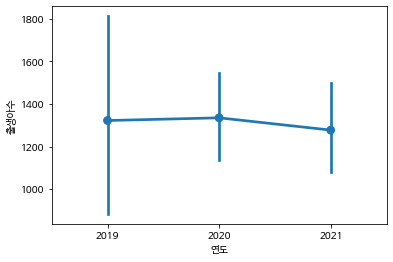

In [54]:
sns.pointplot(data=df_local_all,x="연도",y="출생아수")

<ipython-input-62-401b71328a71>:3: MatplotlibDeprecationWarning: Unrecognized location 'ceneter right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='ceneter right', bbox_to_anchor=(1.1,0.9),ncol=1)


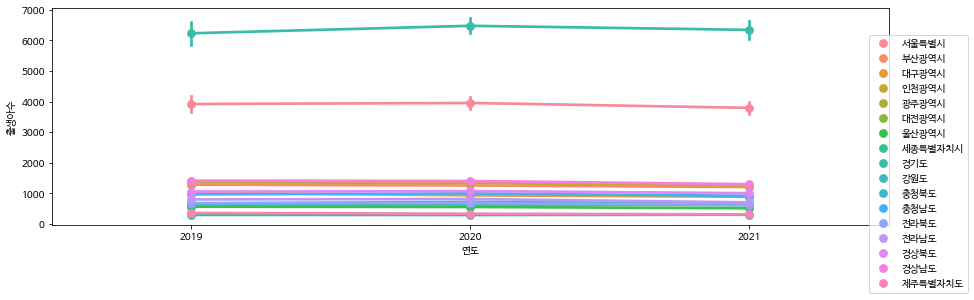

In [62]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local_all,x="연도",y="출생아수",hue="시군구별")
plt.legend(loc='ceneter right', bbox_to_anchor=(1.1,0.9),ncol=1)

In [67]:
df_local_2 = df_local_all[df_local_all['시군구별'].isin(["서울특별시","경기도","세종특별자치시"])]
df_local_2.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,2019.11,4170.0,2019,11,전체
9,세종특별자치시,2019.11,310.0,2019,11,전체
10,경기도,2019.11,6607.0,2019,11,전체
59,서울특별시,2019.12,3670.0,2019,12,전체
66,세종특별자치시,2019.12,274.0,2019,12,전체


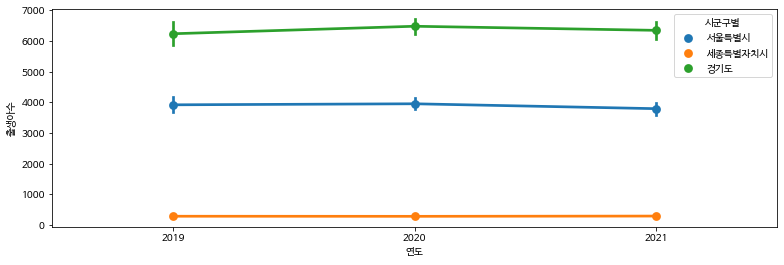

In [70]:
plt.figure(figsize=(13,4))
sns.pointplot(data=df_local_2,x="연도",y="출생아수",hue="시군구별")

In [74]:
df_sj = df[df["시군구별"] == "세종특별자치시"]
df_sj.head()

,시군구별,기간,출생아수,연도,월,성별
9,세종특별자치시,2019.11,310.0,2019,11,전체
28,세종특별자치시,2019.11.1,153.0,2019,11,남자
47,세종특별자치시,2019.11.2,157.0,2019,11,여자
66,세종특별자치시,2019.12,274.0,2019,12,전체
85,세종특별자치시,2019.12.1,160.0,2019,12,남자


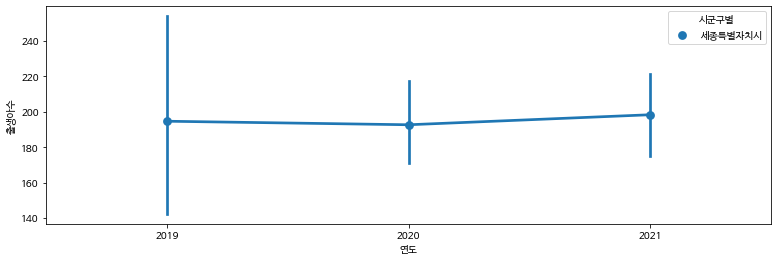

In [75]:
plt.figure(figsize=(13,4))
sns.pointplot(data=df_sj,x="연도",y="출생아수",hue="시군구별")